# Regularized Logistic Regression

We will see from the data plot that it is not suited for a linear decision boundary. To achieve a non-linear boundary, we add higher order terms as features in the training set. However, this can lead to overfitting of the training set. Thus, regularization comes into picture.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

## Import Data

In [18]:
datafile = 'ex2data2.txt'
matrix = np.loadtxt(datafile, delimiter=',')
tests = matrix[:, :-1]
result = matrix[:, -1]

## Visualizing Data

In [19]:
passedIndices = result == 1
failedIndices = result == 0

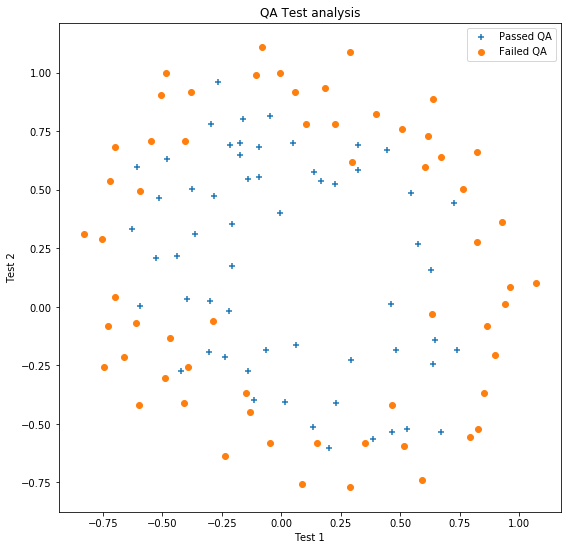

In [20]:
plt.figure(figsize=(9, 9))
plt.scatter(tests[passedIndices, 0], tests[passedIndices, 1], marker='+', label='Passed QA')
plt.scatter(tests[failedIndices, 0], tests[failedIndices, 1], marker='o', label='Failed QA')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('QA Test analysis')
plt.legend()

In [21]:
## Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [22]:
def sigmoid_inverse(z):
    return np.log(z/(1-z))

In [23]:
# required for reconciling the matrix form and the form in which scipy.optimize.minimize expects input
def reshape_theta(theta):
    shape = len(theta.shape)
    num_features = theta.shape[0]
    if (shape == 1):
        theta = theta.reshape((num_features, 1))
    return theta

In [24]:
def hypothesis(theta, trainingX):
    theta = reshape_theta(theta)
    return sigmoid(np.dot(trainingX, theta))

In [30]:
np.array([[1], [2], [3]])

AttributeError: 'numpy.ndarray' object has no attribute 'square'

In [25]:
## includes regularization term
def cost_function(theta, trainingX, trainingY, reg):
    theta = reshape_theta(theta)
    num_of_examples = trainingX.shape[0]
    learning_cost = -1 * np.sum((trainingY * np.log(hypothesis(theta, trainingX)) + (1 - trainingY) * np.log(1 - hypothesis(theta, trainingX))), axis=0) / num_of_examples
    regularization_cost = np.sum(np.square(theta[1:, :]), axis=0) * reg / (2 * num_of_examples)
    return - np.sum((trainingY * np.log(hypothesis(theta, trainingX)) + (1 - trainingY) * np.log(1 - hypothesis(theta, trainingX))), axis=0) / num_of_examples

In [26]:
def gradient(theta, trainingX, trainingY):
    num_of_examples = trainingX.shape[0]
    theta = reshape_theta(theta)
    return np.dot(trainingX.transpose(), hypothesis(theta, trainingX) - trainingY) / num_of_examples

In [27]:
# this function returns the values in the form that the scipy.optimize.minimize expects
def cost_and_gradient(theta, trainingX, trainingY):
    cost = cost_function(theta, trainingX, trainingY)
    grad = gradient(theta, trainingX, trainingY)
    return cost[0], grad.reshape((trainingX.shape[1]))
    #return cost_function(theta, trainingX, trainingY)[0], gradient(theta, trainingX, trainingY).reshape((trainingX.shape[1]))

In [29]:
poly = PolynomialFeatures(6)
features = poly.fit_transform(tests)
trainingY = np.reshape(result, (features.shape[0], 1))
initial_theta = np.zeros((features.shape[1]))

In [35]:
th = np.ones((5, 2))

In [36]:
th

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [39]:
np.sum(np.square(th[1:, :]), axis=0)

array([4., 4.])

In [ ]:
options = { 'maxiter': }